In [27]:
import pandas as pd 
import numpy as np
from collections import Counter

In [10]:
def unique(list1):
    x = np.array(list1)
    return np.unique(x)

In [83]:
indiv_interests = pd.read_csv('interests.csv')
companies_info = pd.read_csv('companies_info.csv')
results_file = pd.read_csv('results_file.csv')

In [39]:
companies_info.head(7)


,Unnamed: 0,field,comp_url
0,0,Frederiksberg,/company/bmw-group/
1,1,Information Technology & Services,/company/oracle/
2,2,Information Technology & Services,/company/accenture/
3,3,Computer Software,/company/microsoft/
4,4,Internet,/company/linkedin/
5,5,Food & Beverages,/company/nestle-s-a-/
6,6,Internet,/company/google/


In [40]:
indiv_interests.head(7)

,Unnamed: 0,Unnamed: 0.1,name,linkedin_url,reaction,interests
0,0,0,Dellou Mohamed,https://www.linkedin.com/in/dellou-mohamed-677...,LIKE,Banking-Management Consulting-Human Resources-...
1,1,1,Zied MLIK,https://www.linkedin.com/in/zied-mlik-89117b20...,LIKE,Information Technology & Services-Computer Sof...
2,2,2,kochtbene khaoula,https://www.linkedin.com/in/kochtbene-khaoula?...,LIKE,Banking-Telecommunications-Insurance-Financial...
3,3,3,yesmine benrhaim,https://www.linkedin.com/in/yesmine-benrhaim-2...,PRAISE,Banking-Telecommunications-Insurance-Financial...
4,4,4,Abdelkrim Essid,https://www.linkedin.com/in/abdelkrim-essid-ba...,LIKE,Information Technology & Services-Computer Sof...
5,5,5,Aloui Sofiene,https://www.linkedin.com/in/aloui-sofiene-a849...,LIKE,Online Media-Newspapers-Banking-Writing & Edit...
6,6,6,najette boukholda,https://www.linkedin.com/in/najette-boukholda-...,LIKE,Oil & Energy-Non-profit Organization Managemen...


In [87]:
results_file.tail(5)

,Unnamed: 0,name,profile_title,entreprise_name,duration,experience,location,education,nbr_employees,work_field,linkedin_url
188,188,Hiba Jbeli,Internal audit,WIFAK INTERNATIONAL BANK,Oct 2019 – Present,Jun 2016– Present,"Carthage, Tunisia",Institut des Hautes Etudes Commerciales de Car...,152.0,Banking,https://www.linkedin.com/in/hiba-jbeli-a911b61...
189,189,ahmed boubaker,Responsable guichet chez Banque Zitouna,Banque Zitouna,May 2015 – Present,Jan 2014 – Present,"Mahdia Governorate, Tunisia",Academia de Studii Economice din București,838.0,Banking,https://www.linkedin.com/in/ahmed-boubaker-303...
190,190,Samer Ben Ammar,Business Development Manager at Motherson Inno...,Motherson Innovations,Nov 2018 – Present,Dec 2008 – Present,Stuttgart Region,Leibniz Universität Hannover,77.0,Automotive,https://www.linkedin.com/in/samerbenammar?mini...
191,191,Ahmed Lahmadi,Controlling manager,KILANI Grp,Mar 2021 – Present,Jun 2011 – Present,"Tunis, Tunisia",institut supérieur de gestion tunis,NaN,NaN,https://www.linkedin.com/in/ahmed-lahmadi-41b2...
192,192,Msek Samiha,--Étudiant chez institut supérieur de finances...,LEONI TUNISIA,Jul 2018 – Present,Aug 2017 – Present,"Monastir Governorate, Tunisia",institut supérieur de finance et fiscalité,297.0,Automotive,https://www.linkedin.com/in/msek-samiha-077185...


In [41]:
print(len(unique(list(companies_info['field']))))
l_u_interests = unique(list(companies_info['field']))

186


In [42]:
len(indiv_interests)
list(indiv_interests['interests'])[1].split('-')

['Information Technology & Services',
 'Computer Software',
 'Food & Beverages',
 'Internet',
 'Automotive',
 'Human Resources',
 'Food Production',
 'Banking',
 'Civic & Social Organization',
 'Staffing & Recruiting',
 'Financial Services',
 '4,724 followers',
 'Non',
 'profit Organization Management',
 'Sfax',
 '4,679 followers',
 'Oil & Energy',
 'Government Administration',
 '']

In [43]:
def add_column(field,data):
    temp = []
    for i in range(len(indiv_interests)):
        if field in list(indiv_interests['interests'])[i].split('-'):
            temp.append(1)
        else:
            temp.append(0)
    return temp

In [44]:
for l_u in l_u_interests:
    indiv_interests[l_u] = add_column(l_u,indiv_interests)

In [45]:
l = list(indiv_interests.columns)
l_remove = ['Unnamed: 0','Unnamed: 0.1','name','linkedin_url','reaction','interests']
for j in l_remove:
  l.remove(j)  
for i in l:
    print(i)

24 followers
260 followers
4,679 followers
4,724 followers
Accounting
Airlines/Aviation
Animation
Aola, Gizeh
Apparel & Fashion
Architecture & Planning
Arts & Crafts
Atlanta, Georgia
Automotive
Aviation & Aerospace
Banking
Belfort cedex
Biotechnology
Boston, MA
Broadcast Media
Building Materials
Business Supplies & Equipment
Cambridge, England
Cambridge, MA
Cambridge, Massachusetts
Cambridge, ma
Capital Markets
Carthage, Tunis
Casablanca
Cergy-Pontoise
Chemicals
Civic & Social Organization
Civil Engineering
College Park, Maryland
College Station, TX
Columbia, MO
Computer & Network Security
Computer Hardware
Computer Networking
Computer Software
Construction
Consumer Electronics
Consumer Goods
Cosmetics
Créteil, île-de-france
Dairy
Defense & Space
Design
Dhahran, Eastern Province
E-learning
EL MOUROUJ
Edinburgh
Education Management
El Ghazela, Ariana
Electrical & Electronic Manufacturing
Entertainment
Environmental Services
Events Services
Exeter, Devon
Facilities Services
Farming
Finan

In [46]:
temp = []
for i in l:    
    #print(list(indiv_interests[i]).count(1))
    if list(indiv_interests[i]).count(1) < 10:
        temp.append(i)
indiv_interests= indiv_interests.drop(columns = temp)

In [72]:
indiv_interests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 54 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Unnamed: 0                             193 non-null    int64 
 1   Unnamed: 0.1                           193 non-null    int64 
 2   name                                   193 non-null    object
 3   linkedin_url                           193 non-null    object
 4   reaction                               193 non-null    object
 5   interests                              193 non-null    object
 6   Accounting                             193 non-null    int64 
 7   Airlines/Aviation                      193 non-null    int64 
 8   Automotive                             193 non-null    int64 
 9   Aviation & Aerospace                   193 non-null    int64 
 10  Banking                                193 non-null    int64 
 11  Broadcast Media    

In [50]:
print(temp)

['24 followers', '260 followers', '4,679 followers', '4,724 followers', 'Animation', 'Aola, Gizeh', 'Apparel & Fashion', 'Architecture & Planning', 'Arts & Crafts', 'Atlanta, Georgia', 'Belfort cedex', 'Biotechnology', 'Boston, MA', 'Building Materials', 'Business Supplies & Equipment', 'Cambridge, England', 'Cambridge, MA', 'Cambridge, Massachusetts', 'Cambridge, ma', 'Capital Markets', 'Carthage, Tunis', 'Casablanca', 'Cergy-Pontoise', 'Civil Engineering', 'College Park, Maryland', 'College Station, TX', 'Columbia, MO', 'Computer & Network Security', 'Computer Hardware', 'Construction', 'Créteil, île-de-france', 'Dairy', 'Defense & Space', 'Design', 'Dhahran, Eastern Province', 'E-learning', 'EL MOUROUJ', 'Edinburgh', 'Education Management', 'El Ghazela, Ariana', 'Environmental Services', 'Events Services', 'Exeter, Devon', 'Facilities Services', 'Farming', 'Frederiksberg', 'Furniture', 'Gif-sur-Yvette, île-de-france', 'Glass, Ceramics & Concrete', 'Glassboro, NJ', 'Government Relati

In [54]:
info_dict = {}
for i in list(indiv_interests.columns):
    info_dict[i] = list(indiv_interests[i]).count(1)

In [63]:
info_dict.pop('Unnamed: 0')
info_dict.pop('Unnamed: 0.1')
info_dict.pop('name')
info_dict.pop('linkedin_url')
info_dict.pop('reaction')
info_dict.pop('interests')

0

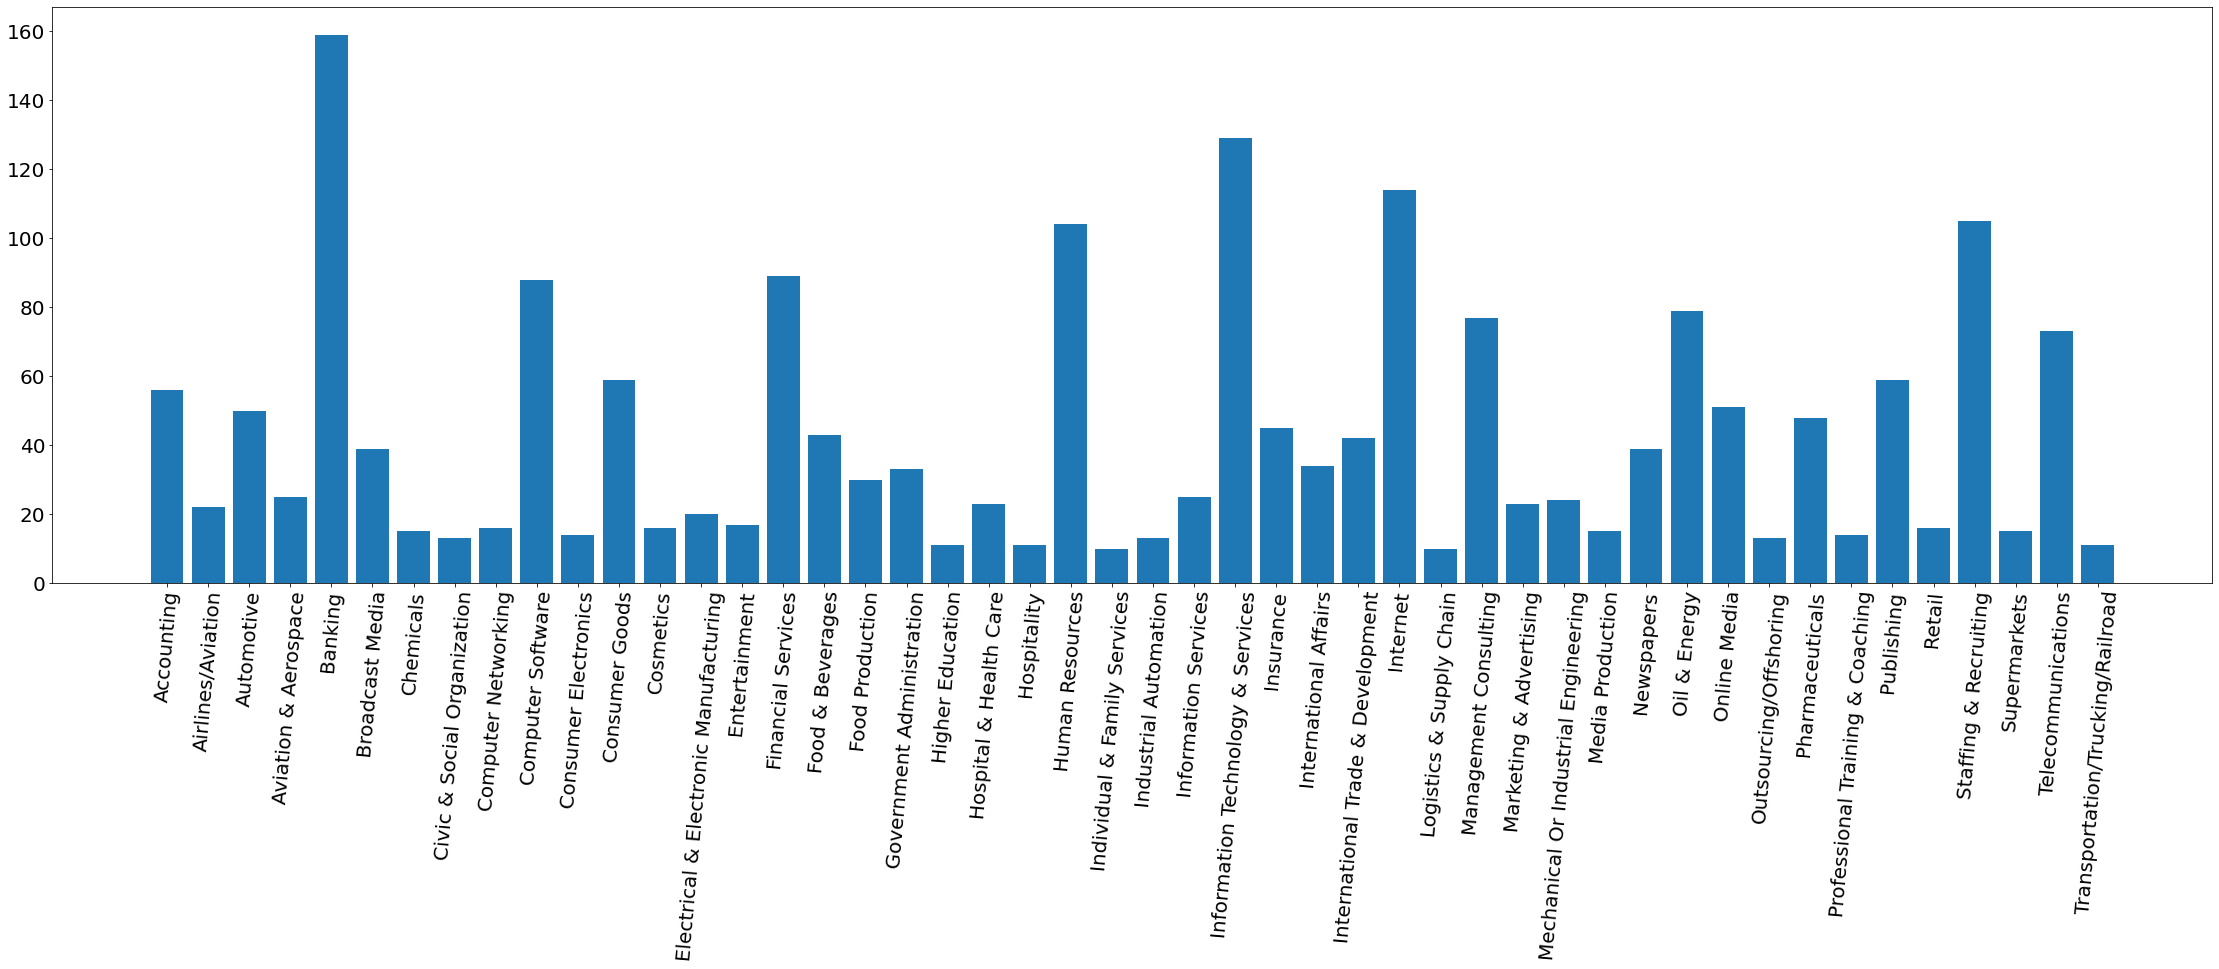

In [70]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,5,2])
langs = list(info_dict.keys())
students = list(info_dict.values())
ax.bar(langs,students)
plt.xticks(rotation=85)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(20)
plt.show()

In [75]:
data_res = pd.read_csv('results_file_processed.csv')
data_res.head(5)

,name_x,profile_title,entreprise_name,nbr_employees,work_field,linkedin_url,reaction,region,current_job_duration,total_experience
0,Dellou Mohamed,Étudiant à Faculté des Sciences Economiques et...,Currently Unemployed,0.0,unemployed,https://www.linkedin.com/in/dellou-mohamed-677...,LIKE,Grand -Tunis,0,0
1,Zied MLIK,Supply Chain Manager,Délice Holding,137.0,Food Production,https://www.linkedin.com/in/zied-mlik-89117b20...,LIKE,Grand -Tunis,785,4376
2,kochtbene khaoula,I have a master in banking and international ...,ophtalmologist,0.0,unemployed,https://www.linkedin.com/in/kochtbene-khaoula?...,LIKE,Centre-Est,0,0
3,yesmine benrhaim,Étudiant(e) en 2MP ingénierie financière,Société jmal EJM,0.0,unemployed,https://www.linkedin.com/in/yesmine-benrhaim-2...,PRAISE,unknown,85,1059
4,Abdelkrim Essid,Agent comptable chez société les professionne...,société les professionnels des dattes,0.0,unemployed,https://www.linkedin.com/in/abdelkrim-essid-ba...,LIKE,Grand -Tunis,334,334


In [77]:
data_res = data_res[['linkedin_url','current_job_duration','total_experience']]
data_res.head(5)

,linkedin_url,current_job_duration,total_experience
0,https://www.linkedin.com/in/dellou-mohamed-677...,0,0
1,https://www.linkedin.com/in/zied-mlik-89117b20...,785,4376
2,https://www.linkedin.com/in/kochtbene-khaoula?...,0,0
3,https://www.linkedin.com/in/yesmine-benrhaim-2...,85,1059
4,https://www.linkedin.com/in/abdelkrim-essid-ba...,334,334


In [80]:
indiv_interests.head(5)

,Unnamed: 0,Unnamed: 0.1,name,linkedin_url,reaction,interests,Accounting,Airlines/Aviation,Automotive,Aviation & Aerospace,...,Online Media,Outsourcing/Offshoring,Pharmaceuticals,Professional Training & Coaching,Publishing,Retail,Staffing & Recruiting,Supermarkets,Telecommunications,Transportation/Trucking/Railroad
0,0,0,Dellou Mohamed,https://www.linkedin.com/in/dellou-mohamed-677...,LIKE,Banking-Management Consulting-Human Resources-...,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,1,Zied MLIK,https://www.linkedin.com/in/zied-mlik-89117b20...,LIKE,Information Technology & Services-Computer Sof...,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,2,2,kochtbene khaoula,https://www.linkedin.com/in/kochtbene-khaoula?...,LIKE,Banking-Telecommunications-Insurance-Financial...,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,3,yesmine benrhaim,https://www.linkedin.com/in/yesmine-benrhaim-2...,PRAISE,Banking-Telecommunications-Insurance-Financial...,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,4,Abdelkrim Essid,https://www.linkedin.com/in/abdelkrim-essid-ba...,LIKE,Information Technology & Services-Computer Sof...,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [79]:
df = pd.merge(data_res,indiv_interests,on='linkedin_url')
df.head(5)

,linkedin_url,current_job_duration,total_experience,Unnamed: 0,Unnamed: 0.1,name,reaction,interests,Accounting,Airlines/Aviation,...,Online Media,Outsourcing/Offshoring,Pharmaceuticals,Professional Training & Coaching,Publishing,Retail,Staffing & Recruiting,Supermarkets,Telecommunications,Transportation/Trucking/Railroad
0,https://www.linkedin.com/in/dellou-mohamed-677...,0,0,0,0,Dellou Mohamed,LIKE,Banking-Management Consulting-Human Resources-...,0,0,...,0,0,0,0,0,0,1,0,0,0
1,https://www.linkedin.com/in/zied-mlik-89117b20...,785,4376,1,1,Zied MLIK,LIKE,Information Technology & Services-Computer Sof...,0,0,...,0,0,0,0,0,0,1,0,0,0
2,https://www.linkedin.com/in/kochtbene-khaoula?...,0,0,2,2,kochtbene khaoula,LIKE,Banking-Telecommunications-Insurance-Financial...,0,0,...,0,0,0,0,0,0,0,0,1,0
3,https://www.linkedin.com/in/yesmine-benrhaim-2...,85,1059,3,3,yesmine benrhaim,PRAISE,Banking-Telecommunications-Insurance-Financial...,0,0,...,0,0,0,0,0,0,0,0,1,0
4,https://www.linkedin.com/in/abdelkrim-essid-ba...,334,334,4,4,Abdelkrim Essid,LIKE,Information Technology & Services-Computer Sof...,0,0,...,0,0,0,0,0,0,1,0,0,0


In [81]:
indiv_interests.to_csv('processed_interests_data.csv')
df.to_csv('processed_interests_data_added.csv')